In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Check the data

In [2]:
model_data = pd.read_csv('model_data.csv')

In [8]:
model_data.head(5)

In [4]:
model_data.info()

In [60]:
model_data[model_data["X1"].isnull()].to_csv("null_values.csv")

In [5]:
model_data.describe()

In [10]:
pd.DataFrame(model_data.describe()).transpose().to_csv('Variable Describtion.csv')

### Check missing data

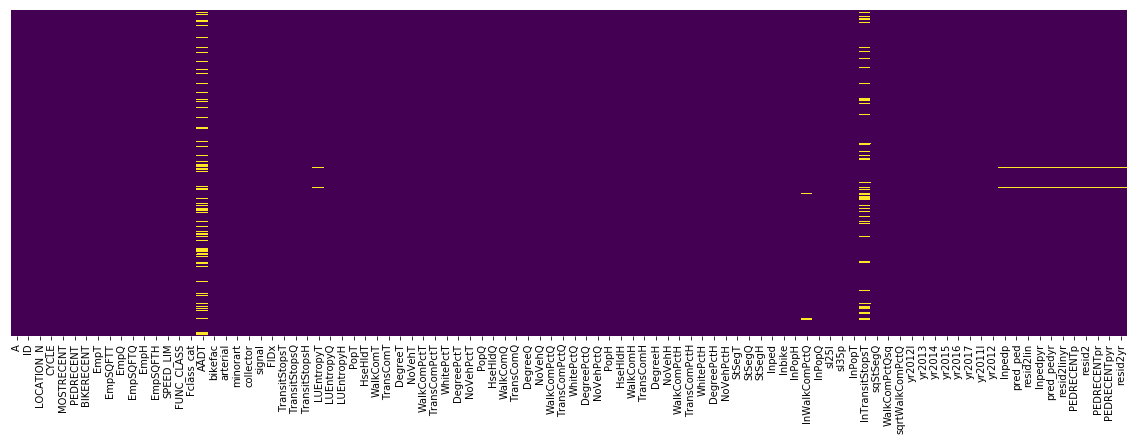

In [5]:
plt.figure(figsize=(20,6))
sns.heatmap(model_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Further check variable distribution

In [308]:
# sns.jointplot(model_data['PEDRECENT'],model_data['BIKERECENT'],kind='hex')

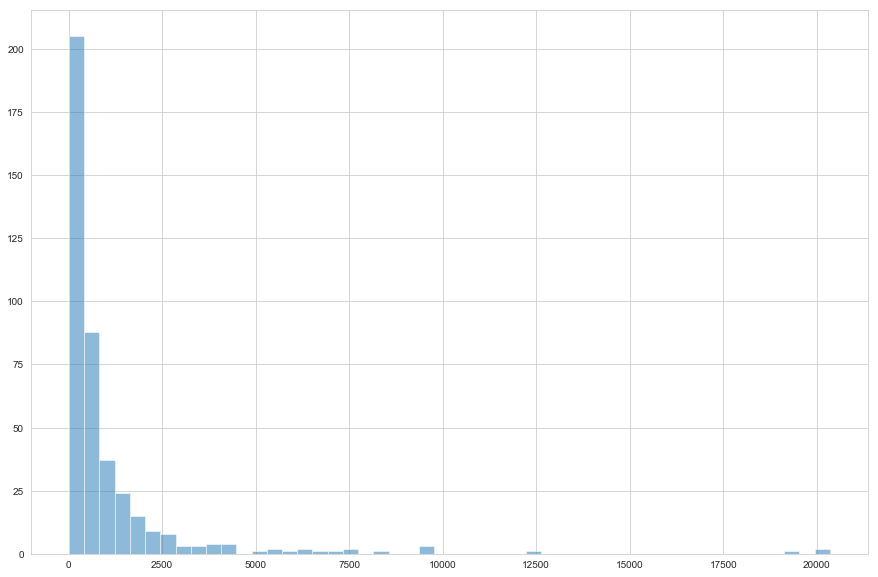

In [320]:
# Y1
plt.figure(figsize=(15,10))
model_data['Y1'].hist(bins=50,alpha=0.5)

In [6]:
# Y2
# plt.figure(figsize=(15,10))
# model_data['Y2'].hist(bins=50,alpha=0.5)

### Check pearson correlation

In [25]:
# plt.figure(figsize=(100,100))
# sns.heatmap(model_data.corr(),annot=True)
# plt.savefig("correlation.png")

In [27]:
corr_mtx = model_data.corr().abs()

In [31]:
corr_list = corr_mtx.unstack()
corr_list = corr_list.sort_values(kind="quicksort",ascending=False)

In [35]:
corr_list.to_csv('correlation.csv')

### Clean and Clarify categorical data

In [235]:
# remove text and null columns first
model_data_updt = model_data.drop(['A','ID','LOCATION_N'],axis=1)
model_data_updt = model_data_updt.dropna()

In [9]:
model_data_updt.info()

In [237]:
# convert numric to categorical variable
for col in ['X3','X4','X5']:
    model_data_updt[col] = model_data_updt[col].astype('category')

In [10]:
print(model_data_updt.dtypes)

## 2. Preliminary Ped model

In [20]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

In [388]:
## NB model IRLS estimation
x_constant = sm.add_constant(x)
x_constant = pd.get_dummies(x_constant)
model = sm.GLM(y_nb,x_constant, family= sm.families.NegativeBinomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              PEDRECENT   No. Observations:                  414
Model:                            GLM   Df Residuals:                      405
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3093.4
Date:                Sat, 30 Mar 2019   Deviance:                       299.01
Time:                        17:08:20   Pearson chi2:                     366.
No. Iterations:                    17   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.1044      0.246      8.562      0.000       1.623       2.586
lnPopT            0.1679      0.096      1.753      0.080      -0.020       0.356
WalkComPctQsq    10.7220      1.017     10.541      0.000       8.728      12.716
LUEntropyT        0.8257      0.216      3.826      0.000       0.403       1.249
TransitStopsT     0.0289      0.011      2.536      0.011       0.007       0.051
DegreePctH        2.5909      0.589      4.398      0.000       1.436       3.746
TransComPctT      1.9101      0.889      2.148      0.032       0.167       3.653
arterial_0        0.7915      0.131      6.040      0.000       0.535       1.048
arterial_1        1.3129      0.137      9.614      0.000       1.045       1.581
sl25l_0           0.4645      0.166      2.805      0.005       0.140       0.789
sl25l_1           1.6399      0.157     10.425      0.000       1.332       1.948
=================================================================================
"""

In [240]:
## NB model MLE estimation
ped_model_nb = smf.negativebinomial(formula="Y ~ X",data=model_data_updt).fit()
ped_model_nb.summary()

         Current function value: 7.421508
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\liuxi\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:              PEDRECENT   No. Observations:                  414
Model:               NegativeBinomial   Df Residuals:                      405
Method:                           MLE   Df Model:                            8
Date:                Sat, 30 Mar 2019   Pseudo R-squ.:                 0.06650
Time:                        11:39:26   Log-Likelihood:                -3072.5
converged:                      False   LL-Null:                       -3291.4
                                        LLR p-value:                 1.574e-89
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.1585      0.423      9.823      0.000       3.329       4.988
arterial[T.1]     0.5024      0.086      5.827      0.000       0.333       0.671
sl25l[T.1]        1.1531      0.176      6.545      0.000       0.808       1.498
lnPopT            0.3462      0.067      5.165      0.000       0.215       0.478
WalkComPctQsq    10.2762      0.782     13.145      0.000       8.744      11.808
WhitePctQ         0.6404      0.200      3.199      0.001       0.248       1.033
sqStSegQ         -0.1662      0.036     -4.656      0.000      -0.236      -0.096
LUEntropyT        0.8831      0.174      5.069      0.000       0.542       1.225
TransitStopsT     0.0416      0.010      4.364      0.000       0.023       0.060
alpha             0.6488      0.041     15.718      0.000       0.568       0.730
=================================================================================
"""

In [241]:
# log-linear model OLS regression
ped_model_lgl = smf.ols(formula="Y ~ X",
                          data=model_data_updt).fit()
ped_model_lgl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnped   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     60.87
Date:                Sat, 30 Mar 2019   Prob (F-statistic):           8.60e-65
Time:                        11:39:59   Log-Likelihood:                -537.22
No. Observations:                 414   AIC:                             1092.
Df Residuals:                     405   BIC:                             1129.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.1042      0.498      4.223      0.000       1.125       3.084
arterial[T.1]     0.4447      0.094      4.715      0.000       0.259       0.630
sl25l[T.1]        1.0018      0.188      5.333      0.000       0.632       1.371
lnPopT            0.5664      0.078      7.221      0.000       0.412       0.721
WalkComPctQsq    10.7698      0.897     12.008      0.000       9.007      12.533
WhitePctQ         0.6772      0.214      3.165      0.002       0.257       1.098
sqStSegQ         -0.1052      0.037     -2.813      0.005      -0.179      -0.032
LUEntropyT        0.8592      0.194      4.431      0.000       0.478       1.240
TransitStopsT     0.0437      0.010      4.174      0.000       0.023       0.064
==============================================================================
Omnibus:                       10.035   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               13.826
Skew:                          -0.204   Prob(JB):                     0.000995
Kurtosis:                       3.797   Cond. No.                         241.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Stepwise regression - not implemented

In [ ]:
# def forward_selected(data, response):
#     """Linear model designed by forward selection.

#     Parameters:
#     -----------
#     data : pandas DataFrame with all possible predictors and response

#     response: string, name of response column in data

#     Returns:
#     --------
#     model: an "optimal" fitted statsmodels linear model
#            with an intercept
#            selected by forward selection
#            evaluated by adjusted R-squared
#     """
#     remaining = set(data.columns)
#     remaining.remove(response)
#     selected = []
#     current_score, best_new_score = 0.0, 0.0
#     while remaining and current_score == best_new_score:
#         scores_with_candidates = []
#         for candidate in remaining:
#             formula = "{} ~ {} + 1".format(response,
#                                            ' + '.join(selected + [candidate]))
#             score = smf.ols(formula, data).fit().rsquared_adj
#             scores_with_candidates.append((score, candidate))
#         scores_with_candidates.sort()
#         best_new_score, best_candidate = scores_with_candidates.pop()
#         if current_score < best_new_score:
#             remaining.remove(best_candidate)
#             selected.append(best_candidate)
#             current_score = best_new_score
#     formula = "{} ~ {} + 1".format(response,
#                                    ' + '.join(selected))
#     model = smf.ols(formula, data).fit()
#     return model

## 3. Feature selection

In [6]:
from sklearn.feature_selection import RFE
# from sklearn.feature_selection import RFECV
# from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RandomizedLasso

In [106]:
X = model_data_updt.drop(['Y'],axis=1)
Y = model_data_updt["Y"]

In [107]:
names = X.columns

In [11]:
X.info()

### Stability Selection

In [109]:
from sklearn.linear_model import RandomizedLasso

In [12]:
rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(X, Y)

In [13]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True))

### Feature Selection Pipeline

In [112]:
from sklearn.datasets import load_boston
from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from minepy import MINE

In [113]:
ranks = {}
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))

In [114]:
## Log-linear coefficient rank
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)

In [14]:
## Ridge Regression
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)

In [15]:
## Lasso regression
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)

In [16]:
## Stability Selection
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)

In [17]:
## RFE
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict((rfe.ranking_), names, order=-1)

In [18]:
## RF feature importance

rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)

In [121]:
## Correlation
f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)

In [122]:
## MIC
mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
    mine.compute_score(X.iloc[:,i], Y)
    m = mine.mic()
    mic_scores.append(m)
 
ranks["MIC"] = rank_to_dict(mic_scores, names) 

In [126]:
r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

In [127]:
print("\t%s" % "\t".join(methods))
for name in names:
    print("%s\t%s" % (name, "\t".join(map(str,[ranks[method][name] for method in methods]))))

	Corr.	Lasso	Linear reg	MIC	Mean	RF	RFE	Ridge	Stability	Mean
EmpT	0.36	0.0	0.0	0.96	0.18	0.06	0.1	0.0	0.0	0.18
EmpSQFTT	0.36	0.0	0.0	0.98	0.24	0.6	0.0	0.0	0.0	0.24
EmpQ	0.52	0.0	0.0	0.91	0.19	0.04	0.07	0.0	0.0	0.19
EmpSQFTQ	0.44	0.0	0.0	0.9	0.21	0.33	0.03	0.0	0.0	0.21
EmpH	0.67	0.0	0.0	0.96	0.22	0.04	0.05	0.0	0.0	0.22
EmpSQFTH	0.53	0.0	0.0	1.0	0.3	0.81	0.02	0.0	0.0	0.3
bikefac	0.01	0.02	0.0	0.25	0.1	0.03	0.48	0.02	0.0	0.1
arterial	0.02	0.15	0.0	0.31	0.24	0.02	0.84	0.55	0.0	0.24
minorart	0.0	0.0	0.0	0.18	0.11	0.01	0.56	0.15	0.0	0.11
collector	0.01	0.0	0.0	0.22	0.13	0.0	0.54	0.29	0.0	0.13
signal	0.1	0.0	0.0	0.4	0.14	0.02	0.52	0.05	0.0	0.14
FIDx	0.0	0.0	0.0	0.52	0.1	0.1	0.2	0.0	0.0	0.1
TransitStopsT	0.39	0.13	0.0	0.59	0.24	0.09	0.64	0.12	0.0	0.24
TransitStopsQ	0.58	0.01	0.0	0.73	0.21	0.11	0.23	0.0	0.0	0.21
TransitStopsH	0.54	0.01	0.0	0.83	0.23	0.06	0.38	0.0	0.0	0.23
LUEntropyT	0.11	0.0	0.0	0.53	0.34	0.08	0.98	1.0	0.0	0.34
LUEntropyQ	0.07	0.0	0.0	0.47	0.18	0.06	0.87	0.0	0.0	0.18
LUEntropyH

In [128]:
pd.DataFrame(ranks).to_csv("ranks.csv")

# 4. Model Selection

In [19]:
# log-linear model
ped_model_lgl = smf.ols(formula="Y ~ X",
                          data=model_data_updt).fit()
# + NoVehPctT
ped_model_lgl.summary()

In [20]:
## NB model
ped_model_nb = smf.negativebinomial(formula="Y ~ X",
                          data=model_data_updt).fit()
# + NoVehPctT
ped_model_nb.summary()

### k-fold cross validation manually

In [608]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [697]:
n = 8
mse_nb = list()
mse_ll = list()
trainlist = list()
testlist = list()
kfold= KFold(n_splits=n,shuffle=True,random_state=1)

In [698]:
kf_data = kfold.split(model_data_updt)

In [21]:
# for i in range(n):
for data in kf_data:
#     kf_data = next(kfold.split(model_data_updt))
#     kf_data = kfold.split(model_data_updt).__next__()
#     train = model_data_updt.iloc[kf_data[0]]
#     test = model_data_updt.iloc[kf_data[1]]
    train = model_data_updt.iloc[data[0]]
    test = model_data_updt.iloc[data[1]]
    trainlist.append(train)
    testlist.append(test)
    ped_model_nb = smf.negativebinomial(formula="Y ~ X",
                          data=train).fit()
    ped_model_ll = smf.ols(formula="Y ~ X",
                          data=train).fit()
    y_pred_nb = ped_model_nb.predict(test)
    y_pred_ll = ped_model_ll.predict(test)
    mse_nb.append(mean_squared_error(test['Y'], y_pred_nb))
    mse_ll.append(mean_squared_error(test['Y'], np.exp(y_pred_ll)))

In [703]:
mse_table = {'NB':mse_nb,'log-l':mse_ll}
pd.DataFrame(mse_table)

,NB,log-l
0,4.719920e+05,4.964568e+05
1,1.625939e+06,1.279697e+06
2,4.539919e+05,3.348220e+05
3,5.098981e+06,5.859462e+06
4,6.750688e+06,4.514999e+06
5,2.200982e+06,1.560515e+06
6,2.690441e+06,3.858621e+06
7,3.605764e+06,2.091742e+06


In [705]:
np.mean(mse_table['NB'])

2862347.3630963843

In [706]:
np.mean(mse_table['log-l'])

2499539.428238647

### kfold validation using sklearn

In [425]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm
 
class statsmodel(BaseEstimator, RegressorMixin):
    def __init__(self, sm_class, formula):
        self.sm_class = sm_class
        self.formula = formula
        self.model = None
        self.result = None
 
    def fit(self,data,dummy):
        self.model = self.sm_class(self.formula,data)
        self.result = self.model.fit()
 
    def predict(self,X):
        return self.result.predict(X)

In [446]:
ped_model_ll = statsmodel(smf.ols, "Y~X")

In [434]:
ped_model_nb = statsmodel(smf.negativebinomial, "Y~X")

In [ ]:
crossvalidation = KFold(n_splits=10,shuffle=True)

In [447]:
scores_ll = cross_val_score(ped_model_ll, model_data_updt, model_data_updt['lnped'],scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
print("Degree-"+str(i)+" log-linear MSE: " + str(np.mean(np.abs(scores_ll))) + ", STD: " + str(np.std(scores_ll)))

Degree-10 log-linear MSE: 0.7945271951187144, STD: 0.15599719544995705


In [22]:
scores_nb = cross_val_score(ped_model_nb, model_data_updt, model_data_updt['PEDRECENT'],scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
print("Degree-"+str(i)+" NB MSE: " + str(np.mean(np.abs(scores_nb))) + ", STD: " + str(np.std(scores_nb)))